### Assignment by:

Shahbaz Chaudhary

Cyrus Safaie

Kamila Thompson 

 1 - Consider the following LP problem:
 
 \begin{equation}
\begin{array}{rrclcl}
\displaystyle \max_{x} & -3 x_1+ 4{x_2} \\
\textrm{s.t.} & -x_1+x_2 & \leq & {0} \\
& -x_1+ 2x_2 & \leq & {2} \\
& x_1& \geq & {1} \\
& x_2& \leq & {3} \\
& x_1, x_2\geq{0} \\
\end{array}
\end{equation}

A. Plot all linear constraints and the objective function at the optimal level

B. Produce a table with all possible basic solutions and their respective objective function values. Determine the solution.

C. Solve the problem using the step by step simplex method discussed in the lecture. Verify that the solution is the same as in item B.

D. Solve the problem using the LP solver from Julia. Verify that the solution coincide with the solution in items B and C.

A.

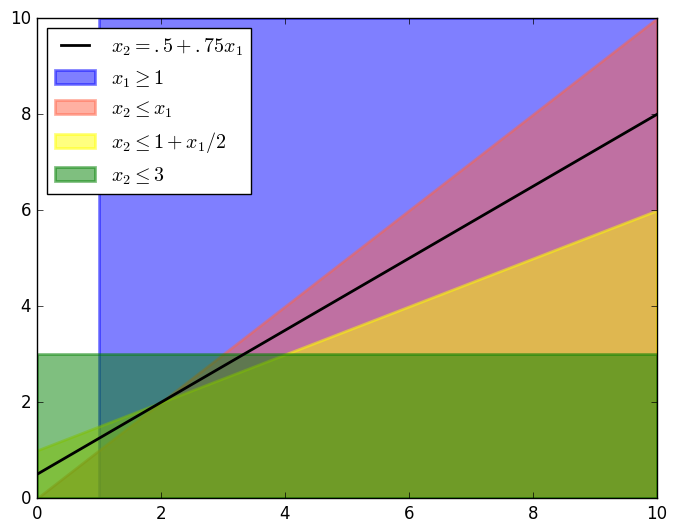

PyObject <matplotlib.legend.Legend object at 0x321511710>

In [10]:
using JuMP
using GLPKMathProgInterface
using PyPlot

x1 = collect(0:0.1:10)
x2a = x1
x2b = 2/2 + x1/2
x2c = 3
obj = 2/4 + 3/4 * x1

fig, ax = subplots()


ax[:fill_betweenx](x1,1,10,color="blue",linewidth=2,label=L"x_{1} \geq 1",alpha=0.5)
ax[:legend](loc="upper left")

ax[:fill_between](x1,x2a,color="tomato",linewidth=2,label=L"x_{2} \leq x_{1}",alpha=0.5)
ax[:legend](loc="upper left")

ax[:fill_between](x1,x2b,color="yellow",linewidth=2,label=L"x_{2} \leq 1 + x_{1}/2",alpha=0.5)
ax[:legend](loc="upper left")

ax[:fill_between](x1,x2c,color="green",linewidth=2,label=L"x_{2} \leq 3",alpha=0.5)
ax[:legend](loc="upper left")

ax[:plot](x1,obj,color="black",linewidth=2,label=L"x_{2} = .5 + .75 x_{1}",alpha=1)
ax[:legend](loc="upper left")

B.

In [47]:
using GLPKMathProgInterface

c = [-3;  4; 0; 0; 0;0]
A = [-1 1 1 0 0 0;
     -1 2 0 1 0 0;
     -1 0 0 0 1 0;
      0 1 0 0 0 1]
b = [0; 2; -1; 3 ]

m, n = size(A)
x_lb = [0;0;0;0;0;0];

newModel = Model(solver = GLPKSolverMIP())
@variable(newModel, x[i=1:n] >=x_lb[i])
for i=1:m
    @constraint(newModel, sum(A[i,j]*x[j] for j=1:n) == b[i])
end
    @objective(newModel, Max, sum(c[j]*x[j] for j=1:n))
println("The optimization problem to be solved is:")
print(newModel)
println(" ")
println("The rank of the matrix A: ",rank(A))
println("The number of linear restrictions: ", m)
println("The number of variables: ",n)
println("Number of basic solutions n!/m!(n-m)!: ",factorial(n)/(factorial(m)*factorial(n-m)))

The optimization problem to be solved is:
Max -3 x[1] + 4 x[2]
Subject to
 -x[1] + x[2] + x[3] = 0
 -x[1] + 2 x[2] + x[4] = 2
 -x[1] + x[5] = -1
 x[2] + x[6] = 3
 x[i] ≥ 0 ∀ i ∈ {1,2,…,5,6}
 
The rank of the matrix A: 4
The number of linear restrictions: 4
The number of variables: 6
Number of basic solutions n!/m!(n-m)!: 15.0


In [48]:
@time begin
    status = solve(newModel)
end
println("Objective value: ", getobjectivevalue(newModel))
println("Optimal solution is x = \n", getvalue(x))

  0.000671 seconds (128 allocations: 9.703 KB)
Objective value: 2.0
Optimal solution is x = 
[2.0,2.0,0.0,0.0,1.0,1.0]


In [107]:
using DataFrames, Combinatorics

combs = collect(combinations(1:n, m))
resual = DataFrame(comb_1=NaN,comb_2=NaN,comb_3=NaN,comb_4=NaN,x_B_1=NaN,x_B_2=NaN,x_B_3=NaN,x_B_4=NaN,z=NaN)

for i in 1:length(combs)
    comb = combs[i,]
    B = A[:, comb]
    c_B = c[comb]
    x_B = inv(B)*b

    if maximum(x_B)>0
        z = 0
    else 
        z = dot(c_B, x_B)
    end
    if i==1
        resual = DataFrame(comb_1=comb[1],comb_2=comb[2],comb_3=comb[3],comb_4=comb[4],x_B_1=x_B[1],x_B_2=x_B[2],x_B_3=x_B[3],x_B_4=x_B[4],z=z)
    else
        push!(resual, @data([comb[1],comb[2],comb[3],comb[3],x_B[1],x_B[2],x_B[3],x_B[4],z]))
    end
end
sort(resual,cols=:z,rev=false)

LoadError: Base.LinAlg.SingularException(4)

D.

In [13]:
myModel = Model(solver=GLPKSolverLP())

@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)

@constraint(myModel, -1 * x1 + x2 <= 0)
@constraint(myModel, -1 * x1 + 2*x2 <= 2)
@constraint(myModel, x1 >= 1)
@constraint(myModel, x2 <= 3)

@objective(myModel, Max, -3 * x1 + 4 * x2)
myModel

Maximization problem with:
 * 4 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [14]:
@time begin
    status = solve(myModel)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  0.000337 seconds (101 allocations: 6.422 KB)
Objective value: 2.0
x1 = 2.0
x2 = 2.0


2 - The table below presents hypothetical bid/ask quotes for four major currencies at a given date/time:

|Pair|Bid|Ask|
|---|---|---|
|EUR/USD|0.87060|0.87063|
|GBP/USD|1.42790|1.42796|
|USD/JPY|133.330|133.333|
|EUR/GBP|0.60970|0.60972|
|EUR/JPY|116.140|116.144|
|GBP/JPY|190.480|190.476|

The first currency in a currency pair is called the base currency. The bid and the ask are always quoted in terms of the base currency. For example, if you are buying on EUR/USD trade, then you are effectively receiving EUR in exchange for USD at the ask quote. The website below provides further instructions on how to interpret and understand bid/ask quotes.

https://www.oanda.com/forex-trading/learn/intro-to-currency-trading/conventions/currency-pairs

You were given USD  1
  to attempt an arbitrage trade, assume no transaction costs.

A. Write down a linear programming problem to buy and sell quantities of the base currencies and arbitrage/profit of at most USD  10k.

B. Solve for the buy/sell quantities and the arbitrage/profit amount.

C. Interpret the results and develop a story of the trade executions and the resulting profit.

Here are the variables (similar to textbook examples):

DE = quantity of dollars changed into euros

DP = quantity of dollars changed into pounds

DY = quantity of dollars changed into yens

ED = quantity of euros changed into dollars

EP = quantity of euros changed into pounds

EY = quantity of euros changed into yens

PD = quantity of pounds changed into dollars

PE = quantity of pounds changed into euros

PY = quantity of pounds changed into yens

YD = quantity of yens changed into dollars

YE = quantity of yens changed into euros

YP = quantity of yens changed into pounds

D = quantity of dollars generated through arbitrage



OBJECTIVE

Max D



|    |into |Dollar |Euro |Pound |Yen|
|--- |---|---|---|---|---|
|from|Dollar| 1|1/0.87063 |1/1.42796 |133.333|
|    |Euro| 0.87063| 1|0.60972|116.144|
|    |Pound| 1.42796|1/0.60972| 1|190.476|
|    |Yen|1/133.333 |1/116.144 |1/190.476 |1|

A.



USD: D + DE + DP + DY - 0.87063 ED - 1.42796 PD - 1/133.333 YD = 1

Euro: ED + EP + EY - 1/0.87063 DE - 1/0.60972 PE - 1/116.144 YE = 0

POUND: PD + PE + PY - 1.42796 DP - 0.60972 EP - 1/190.476 YP  =0

YEN: YD + YP + YE - 133.333 DY - 190.476 PY - 116.144 EY

D<=10000

B.

In [26]:
using JuMP
using GLPKMathProgInterface

myModel= Model(solver=GLPKSolverLP())
@variable(myModel, DE >= 0)
@variable(myModel, DP >= 0)
@variable(myModel, DY >= 0)

@variable(myModel, ED >= 0)
@variable(myModel, EP >= 0)
@variable(myModel, EY >= 0)

@variable(myModel, PD >= 0)
@variable(myModel, PE >= 0)
@variable(myModel, PY >= 0)

@variable(myModel, YD >= 0)
@variable(myModel, YP >= 0)
@variable(myModel, YE >= 0)

@variable(myModel,  D >= 0)


@constraint(myModel, D + DE + DP + DY - 0.87063 * ED - 1.42796 * PD - 1/133.333 * YD == 1)
@constraint(myModel, ED + EP + EY - 1/0.87063 * DE - 1/0.60972 * PE - 1/116.144 * YE == 0)
@constraint(myModel, PD + PE + PY - 1.42796 * DP - 0.60972 * EP - 1/190.476 * YP  == 0)
@constraint(myModel, YD + YP + YE - 133.333 * DY - 190.476 * PY - 116.144 * EY == 0)
@constraint(myModel, D <= 10000)

@objective(myModel, Max, D)
myModel

Maximization problem with:
 * 5 linear constraints
 * 13 variables
Solver is GLPKInterfaceLP

In [27]:
@time begin
    status = solve(myModel)
end
println("DE = ", getvalue(DE))
println("DP = ", getvalue(DP))
println("DY = ", getvalue(DY))

println("ED = ", getvalue(ED))
println("EP = ", getvalue(EP))
println("EY = ", getvalue(EY))

println("PD = ", getvalue(PD))
println("PE = ", getvalue(PE))
println("PY = ", getvalue(PY))

println("YD = ", getvalue(YD))
println("YE = ", getvalue(YE))
println("YP = ", getvalue(YP))


  0.000335 seconds (147 allocations: 10.219 KB)
DE = 0.0
DP = 9623.03049277765
DY = 0.0
ED = 0.0
EP = 0.0
EY = 0.0
PD = 13741.302622466772
PE = 0.0
PY = 0.0
YD = 0.0
YE = 0.0
YP = 0.0


In [25]:
println("Objective value: ", getobjectivevalue(myModel))

Objective value: 10000.0


C.

The arbitage opportunity would increase to infinity with no cap, therefore we are capping it at 10K. Based on the LP the optimum solution is to innitialy convert 9623.03049277765 dollars to pound and at the end converting 13741.302622466772 pounds back into dollars. In the LP, intermediary stages would not be extracted in this process.  